**Azalea Yunus and Benji Andrews**

Fall 2020

CS343: Neural Networks

Project 1: Single layer networks

**Submission reminders**:
- Submit rubric on Google Classroom
- Submit one .zip file per team on Google Classroom. Includes:
    - All .ipynb notebook files
    - All .py code files
    - Data files under 10 MB
- Did you answer all 15 questions?

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from adaline import Adaline

# Set the color style so that Professor Layton can see your plots
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
# Make the font size larger
plt.rcParams.update({'font.size': 20})

# Turn off scientific notation when printing
np.set_printoptions(suppress=True, precision=3)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2


def plot_adaline_train(net, loss_list, acc_list, plotMarkers=False):
    n_epochs = len(loss_list)
    
    x = np.arange(1, n_epochs+1)
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f'ADALINE ({n_epochs} epochs)')
    
    curveStr = '-r'
    if plotMarkers:
        curveStr += 'o'
    
    ax1.plot(x, loss_list, curveStr)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (Sum squared error)')
    ax2.plot(x, acc_list, curveStr)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    
    plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Paste in your code to load Old Faithful data with standardized features below**

In [16]:
# loading in old faithful data
old_faith_std = pd.read_csv('data/old_faithful.csv')
of_outputs_std = old_faith_std['severe'].to_numpy()
old_faith_std = old_faith_std.drop(['sample','severe'],axis=1).to_numpy(dtype="float64")

# standardizing the old faithful data first over the whole thing then by feature
old_faith_std = (old_faith_std - np.mean(old_faith_std))/np.std(old_faith_std)
old_faith_std = (old_faith_std - np.mean(old_faith_std,axis=0))/np.std(old_faith_std,axis=0)

## Task 4: ADALINE for regression

Given ADALINE's linear (identity) activation and sum-of-squares loss function, the learned weights can be used for more than just classification. In this task, you will use ADALINE to perform a linear regression (*the same neural network subsumes what you did in CS251!*).

### Goal

Your goal is to get an ADALINE network to predict `waiting` from `eruptions`. That is, you are setting up a simple (bivariate) linear regression with equation $$y_i = m \times x_i + b$$where the "x" variable (*predictor variable*) is `eruptions` and the "y" variable (*response variable*) is `waiting` (raw).

**Ultimately, you want to draw a regression line *through* the Old Faithful data clusters to *join* rather than divide them.**

### Design

You can do the regression with the exact network you have currently implemented. **You shouldn't make any code changes to your `Adaline` class.**  In the cell below, use your network to set up the regression by making appropriate design choices:
- Network input features: How many? What should they be?
- Weights: What do they mean in this problem context?
- What are the "classes"?

### Tips

- I suggest using the standardized version of the predictor (otherwise you may run into numeric stability issues), but it's fine to use the raw/unstandardized response variable. 
- Default hyperparameters should work well.
- You may need to add a singleton dimension below so that your existing code works i.e. `shape=(272,1)`, NOT `shape=(272,)`

**Write your training code in the cell below.**

In [17]:
linreg = Adaline()
eruptions = old_faith_std[:,0][:,np.newaxis]
waiting = old_faith_std[:,1]

# in order to predict waiting from eruptions, use eruptions as the dataset (x) and waiting as the y
loss, acc = linreg.fit(features=eruptions, y=waiting)
# then, predict on the x values in the dataset
# x_i = np.linspace(-1.5, 1.5, 50)
# predicted_waiting = linreg.predict(features=eruptions)

In the cell below, **create a scatter plot of the data and the overlayed regression line**. Have the x-axis map onto standardized `eruptions` and y-axis onto raw `waiting` values.

### Tips
- You will need to leverage the model linear equation to go from x values to predicted y values. $y_i = m \times x_i + b$
- Look at the class boundary plot code that you used for classification. You will need to generate linearly spaced x values before plotting your regression y values on your regression line. 

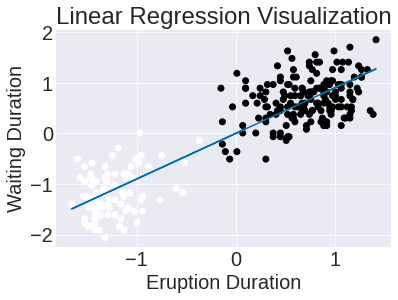

In [18]:
# use weights as slope (m) and bias as y intercept (b)
predicted_waiting = eruptions * linreg.wts[1:] + linreg.wts[0]
plt.plot(eruptions, predicted_waiting)
plt.scatter(x=old_faith_std[:,0], y=old_faith_std[:,1], c=of_outputs_std)
plt.xlabel("Eruption Duration")
plt.ylabel("Waiting Duration")
plt.title("Linear Regression Visualization")
plt.show()

## Task 5: ADALINE and logistic regression

In this task, you will extend ADALINE to logistic regression, where we explicitly represent the probability of class membership.

For example data point $i$ is 80% likely to be in class A and 20% in class B.

**Remember:** Despite the name, logistic regression is actually about solving a **classification** problem. So this is more similar to Task 2 than Task 5.

, overfitting, regularization, training schedules, shuffling data### 5a. Implement logistic regression

Create a subclass of `Adaline` called `AdalineLogistic` in a new file called `adaline_logistic.py`. **Only override existing methods as needed to make the following changes. DO NOT MODIFY `adaline.py` FOR ANY REASON!!**.

#### Design

1. Use the sigmoid activation function. $z = f(x) = \frac{1}{1+e^{-x}}$
2. Represent the output classes as 0 or +1. This should require a code change (activation values >=0.5 are classified as 1, otherwise class 0) and preprocessing of the old faithful data.
3. Use the cross-entropy loss function: $\sum_{i=1}^n \left [ -y_i Log(z_i) - (1-y_i)Log(1 - z_i) \right ] $
where $z_i$ is the activation to input sample $i$ and $y_i$ is the corresponding $i^{th}$ class label (0 or 1).


#### Todo below:

- Train your network using the standardized Old Faithful data. Default hyperparameters should work fine.
- Plot your loss and accuracy as a function of epoch.
- Plot the logistic regression decision boundary and the data (Use your code from Task 2).

#### Questions

**Question 11.** Why do we need to relabel the classes from -1/+1 to 0/1?

#### Answers

11. -1 to +1 has a range of 2, which is confusing when assigning percentage probabilities to points belonging to a certain class. It's more intuitive for the points to either be in the range of 0% (0) to 100% (1). 

In [19]:
from adaline_logistic import AdalineLogistic

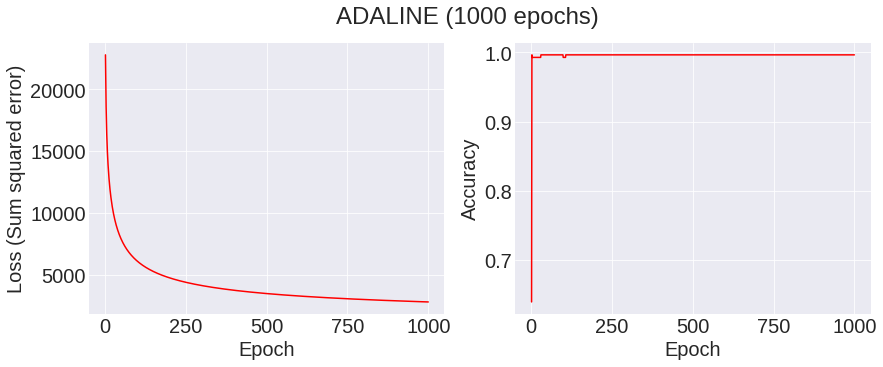

In [20]:
# relabeling data 
of_outputs_std[of_outputs_std == -1] = 0
logreg = AdalineLogistic()

# fitting fitting with logistic regression net
loss, acc = logreg.fit(old_faith_std, of_outputs_std)
plot_adaline_train(logreg, loss, acc)

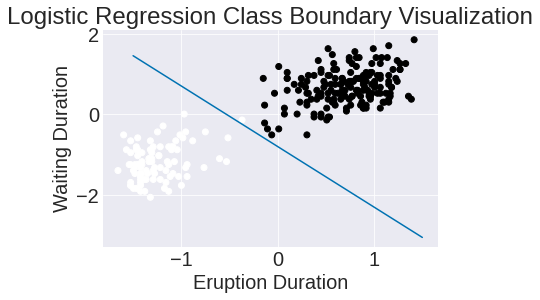

In [21]:
# Class Boundary Visualization
transformed_wts = logreg.get_wts() / logreg.get_wts()[2]
x_i = np.linspace(-1.5, 1.5, 50)
y_i = -x_i*transformed_wts[1] - transformed_wts[0]
plt.scatter(x=old_faith_std[:,0], y=old_faith_std[:,1], c=of_outputs_std)
plt.xlabel("Eruption Duration")
plt.ylabel("Waiting Duration")
plt.title("Logistic Regression Class Boundary Visualization")
plt.plot(x_i, y_i)
plt.show()

### 5b. Test point probabilities

#### Questions

**Question 12.** Determine the probability that the following test points belong to **either class**:

Format: standardized (eruptions, waiting)
- (0.4, 0.98)
- (0.5, -2)
- (-1, 0.5)

The test point classifications are [1. 0. 0.] with the respective certainties: [0.999 0.774 0.635]


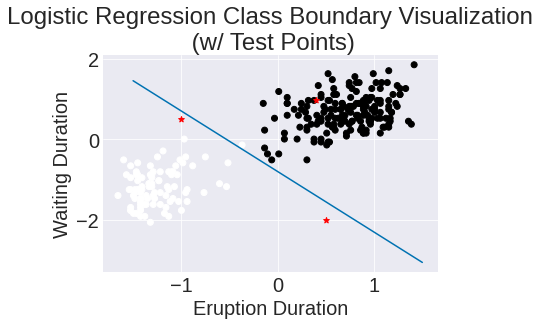

In [22]:
test_points = np.array([[0.4,0.98],[0.5,-2],[-1,0.5]])

# finding certainties
loss, acc = logreg.fit(old_faith_std, of_outputs_std)
test_points_pred, certainty = logreg.predict_probability(test_points)
print(f'The test point classifications are {test_points_pred} with the respective certainties: {certainty}')

# boundary visualization with new points
plt.scatter(x=old_faith_std[:,0], y=old_faith_std[:,1], c=of_outputs_std)
plt.scatter(x=test_points[:,0], y=test_points[:,1], c="red",marker="*")
plt.xlabel("Eruption Duration")
plt.ylabel("Waiting Duration")
plt.title("Logistic Regression Class Boundary Visualization\n (w/ Test Points)")
plt.plot(x_i, y_i)
plt.show()

#### Answers

12. As is shown above, the points were classified as 1,0,0 with the corresponding certainties 0.999, 0.773, 0.635. These have also been plotted on the class boundary visualization, providing some intuiiton to the certainties. We can see that the test point classified very certainly as 1 (black) is in the center of the class cluster, while the test points classified less certainly as 0 (white) are closer to the edges of the class boundary.

## Task 6: Network classification performance comparison

In this task, you will compare the performance of the two classification networks that you have built, plus a new one called Perceptron, on a larger dataset ([Ionosphere dataset](https://archive.ics.uci.edu/ml/datasets/Ionosphere)). A **Perceptron** is a single-layer neural network that works exactly the same as ADALINE, except it uses a different network activation function (`netAct`). The activation function computes the `netAct` as follows:

$$\text{netAct}_i = f(\text{netIn}_i) = 1  \text{ if netIn}_i \geq 0$$
$$\text{netAct}_i = f(\text{netIn}_i) = -1 \text{ if netIn}_i < 0$$

### 6a. Create a Perceptron network and test it on Old Faithful data

- Create a new class in `adaline.py` that will represent your Perceptron classifier. It should inherit from `Adaline`. Override/write any necessary functions. **Hint:** This should be really quick, short, and simple.
- Use the `plot_nets_train` function below to create a "1x2" row of plots that resembles `plot_adaline_train`, where the left plot shows the loss over epochs and the right plot shows the accuracy over epochs. In each of these two plots, you should have three curves: one for ADALINE, one for logistic regression, one for the Perceptron.

If your Perceptron is working, you should see similar (but not identical) plots to those produced by ADALINE.

In [23]:
def plot_nets_train(nets, loss_lists, acc_lists, net_names, plotMarkers=False):
    '''Creates a 1x2 grid of plots showing loss over epochs (left column) and
    accuracy over epochs (right column) for one or more network (num_nets in total).
    Generalizes `plot_adaline_train` for multiple trained networks.
    
    For example, in the case of two networks (e.g. adaline and perceptron; num_nets=2),
    there would be two curves in each of the two plots.
    
    Put differently, the following function call would produce the same pair of plots you've
    been getting up until this point with a single adaline network:
        plot_adaline_train(nets[0], loss_lists[0], acc_lists[0], plotMarkers=plotMarkers)
    
    Parameters:
    -----------
    nets: Python list of network objects. len(nets) = num_nets.
    loss_lists: Python lists of ndarrays. len(loss_lists) = num_nets. len(loss_lists[0]) = n_epochs.
        This would be a list of the loss histories for each of the nets being plotted.
    acc_lists: Python lists of ndarrays. len(acc_lists) = num_nets. len(acc_lists[0]) = n_epochs.
        This would be a list of the accuracy histories for each of the nets being plotted.
    net_names: Python list of str. len(net_names) = num_nets.
        Identifying names of each net (e.g. for legend).
    plotMarkers: boolean.
        Should we draw a plot marker at each epoch on each curve?
    '''
    n_nets = len(nets)
    n_epochs = len(loss_lists[0])
    
    colors = ['orange', 'blue', 'red']
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f'{n_nets} networks trained for ({n_epochs} epochs)')
    
    for net, loss_list, acc_list, color in zip(nets, loss_lists, acc_lists, colors):
        x = np.arange(1, n_epochs+1)

        curveStr = '-r'
        if plotMarkers:
            curveStr += 'o'

        ax1.plot(x, loss_list, curveStr, c=color)
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss (Sum squared error)')
        ax2.plot(x, acc_list, curveStr, c=color)
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
    
    plt.legend(net_names)
    plt.show()

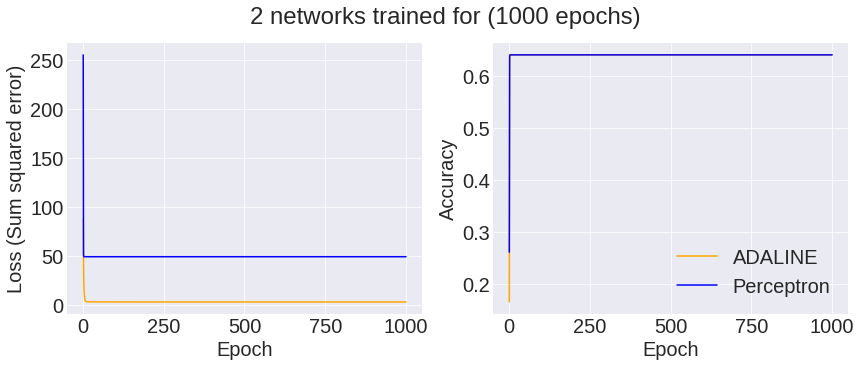

In [24]:
from adaline import Perceptron
net = Adaline()
ptron = Perceptron()
loss_p, acc_p = ptron.fit(features=old_faith_std, y=of_outputs_std)
loss_n, acc_n = net.fit(features=old_faith_std, y=of_outputs_std)
plot_nets_train([net, ptron], [loss_n, loss_p], [acc_n, acc_p], ['ADALINE', 'Perceptron'])

### 6b. The Ionosphere dataset

The [Ionosphere dataset](https://archive.ics.uci.edu/ml/datasets/Ionosphere) is radar signal data collected in Goose Bay, Labrador. It is a more complex dataset than old faithful, with 33 features (but still 2 classes). The class values are coded 'g' for good radar signal and 'b' for bad radar signal.

**Please download the CSV file from the CS343 project website (not above UCI link)** — I have slightly modified the dataset for your convenience.

####  Comparing classifier performance

Your goal is to train, compare, and analyze the performance of your ADALINE, logistic regression, and Perceptron networks on the Ionosphere dataset. How you do this is up to you (including hyperparameters), but you should include the following two plots and answer the below questions.
- One 1x2 plot showing training loss and accuracy of the three networks.
- Two scatter plots (one per network) showing the feature at index 4 on x-axis and the feature at index 19 on the y-axis. Samples should be color coded one of two colors: whether the class was correctly or incorrectly predicted. The data should be plotted on their original scale (i.e. not normalized).

I encourage you to play with the hyperparameters, but in the final plots that you turn-in, please use the same hyperparameter values across the networks to show a fair comparison.

In [25]:
df = pd.read_csv('data/ionosphere.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [26]:
# classes of the ionosphere dataset
iono_classes = df.values[:,-1]
iono_classes = np.where(iono_classes == 'b', 0, 1)

# features of the iono dataset
iono = df.iloc[:,:33].to_numpy(dtype="float64")

# standardizing iono dataset first over the whole thing then by feature
iono_std = (iono - np.mean(iono))/np.std(iono)
iono_std = (iono_std - np.mean(iono_std,axis=0))/np.std(iono_std,axis=0)

# creating three networks
iono_adaline = Adaline()
iono_perceptron = Perceptron()
iono_logreg = AdalineLogistic()

# training three networks
loss_adaline, acc_adaline = iono_adaline.fit(iono_std, iono_classes, lr=0.0001)
loss_perceptron, acc_perceptron = iono_perceptron.fit(iono_std, iono_classes, lr=0.0001)
loss_logreg, acc_logreg = iono_logreg.fit(iono_std, iono_classes, lr=0.0001)

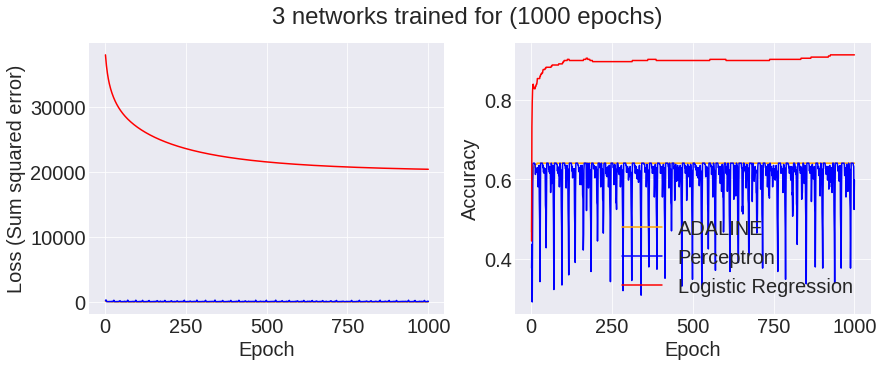

Final Accuracy for ADALINE: 0.6410256410256411
Final Accuracy for Perceptron: 0.5982905982905983
Final Accuracy for Logistic Regression: 0.9145299145299145


In [27]:
# 2 plots
plot_nets_train([iono_adaline, iono_perceptron, iono_logreg], [loss_adaline, loss_perceptron, loss_logreg], [acc_adaline, acc_perceptron, acc_logreg], ['ADALINE', 'Perceptron', "Logistic Regression"])
print("Final Accuracy for ADALINE:", acc_adaline[-1])
print("Final Accuracy for Perceptron:", acc_perceptron[-1])
print("Final Accuracy for Logistic Regression:", acc_logreg[-1])

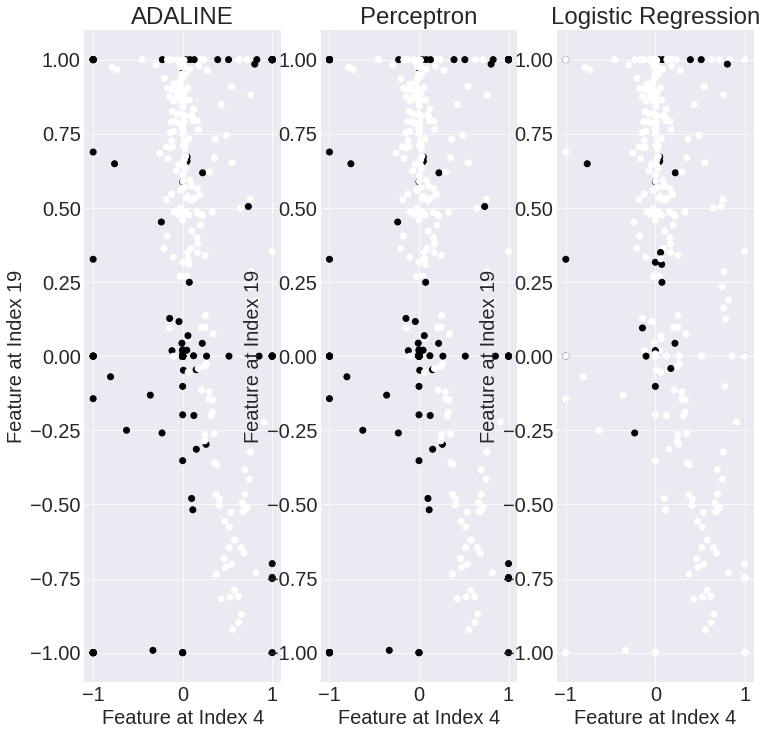

In [28]:
# compare predicated and actual classes for coloring
pred_adaline = iono_adaline.predict(iono_std)
pred_perceptron = iono_perceptron.predict(iono_std)
pred_logreg = iono_logreg.predict(iono_std)
diff_adaline = np.where(pred_adaline == iono_classes, 0, 1)
diff_perceptron = np.where(pred_perceptron == iono_classes, 0, 1)
diff_logreg = np.where(pred_logreg == iono_classes, 0, 1)

# 3 plots
fig, ax = plt.subplots(1,3,figsize=(12,12))

# ADALINE
ax[0].scatter(iono[:, 4], iono[:, 19], c=diff_adaline)
ax[0].set_title("ADALINE")
ax[0].set_xlabel("Feature at Index 4")
ax[0].set_ylabel("Feature at Index 19")

# Perceptron
ax[1].scatter(iono[:, 4], iono[:, 19], c=diff_perceptron)
ax[1].set_title("Perceptron")
ax[1].set_xlabel("Feature at Index 4")
ax[1].set_ylabel("Feature at Index 19")

# Logistic Regression
ax[2].scatter(iono[:, 4], iono[:, 19], c=diff_logreg)
ax[2].set_title("Logistic Regression")
ax[2].set_xlabel("Feature at Index 4")
ax[2].set_ylabel("Feature at Index 19")

plt.show()

#### Questions

**Question 13.** What final accuracy are you able to achieve on the Ionosphere dataset with the three networks?

**Question 14.** Play with the hyperparameters a bit.<br/>(a) For the network that achieves the best final epoch accuracy, what is its key advantage (other than better final accuracy)?<br/>(b) What advantage do the runner-up networks have over the winner, based on the training plots? Explain.

**Question 15.** In your scatter plots showing correct and incorrect sample classifications, how is it possible that misclassifications do not appear to either side of a simple boundary?

#### Answers

13. The final accuracy for ADALINE was about 0.64. The final accuracy for Perceptron was about 0.61. The final accuracy for Logistic Regression was about 0.91. This is reflected also in the scatter plots, since the scatter plot for Logistic Regression has fewer incorrect predictions (colored in black) than both the scatter plots for Perceptron and ADALINE.

14. The advantage of the Logistic Regression network is that the accuracy is better because of the sigmoid loss function, which adds probability to class predictions. The advantages to the Perceptron and ADALINE networks is that they have a much lower loss than that of the Logistic Regression network.

15. The "true" class boundary might be better modeled by a more complex function than a linear one. A more complex class boundary curve might better capture more misclassifications together as a single group.

## Extensions

**NOTE:** Never integrate extensions into your base project so that it changes the expected behavior of core functions. If your extension changes the core design/behavior, no problem, duplicate your working base project and add features from there.

Generally, a small number of "in-depth" extensions count for more than many "shallow" extensions.

1. Extend the ADALINE model to multi-class classification using the One-Vs-Rest (OvR) method. Recall that with this scheme, we train multipler networks with each of the $n$ output classes serving as the +1 class (others set to 0 class). For example, for classes [a, b, c] would would train the networks with the following class labels: [1, 0, 0], [0, 1, 0], [0, 0, 1], respectively. We then classify based on the class that generates the highest max probability / activation value. Test it on a dataset with more than two classes (e.g. Iris). 
2. Create plots of the ADALINE regression after training on different numbers of epochs. One options is to plot all the curves in a single plot and establish a color scheme for time so that the viewer can visually discern the time sequence. Another possibility is to create a NxM grid of plots showing the progression (be sure to label the titles with #epochs).
3. Demonstrate how ADALINE can handle multiple linear regression.
4. Test the performance of single layer neural networks at classifying a binary class dataset of your choice.
5. Compare the performance of ADALINE, Perceptron, and Logistic Regression single-layer networks in additional ways and/or with additional datasets.
6. (Small) Make your early stopping implementation fancier. For example, only stop if the change relative to the average loss over the most recent few epochs is less than the tolerance. Why could this be an improvement over the other method?

For this extension, we applied the three neural networks explored in Project 1 in a new dataset for binary classification. We chose Haberman's breast cancer survival dataset (source: https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival). This data set has three main features (age of breast cancer patient at time of operation, year of operations in the 1900s, number of positive axillary nodes in the patient) and a binary classification that identified pateints who did and did not survive five years after ooperation. We thought that the few variables would make this a straighforward implementation of the three single-layer neural networks, and we followed a similar process to that of the Ionosphere data.

We noticed an interesting trade-off between loss and accuracy in plotting stages after training was complete. The ADALINE network demonstrated the lowest loss (27.1) but also the lowest accuracy (0.26). The Logistic Regression network demonstrated the highest loss (10,054.1) but also the highest accuracy (0.75). The Perceptron network was somewhere in the middle in terms of performance, with a relatively low loss (164.5) and very poor accuracy (0.18).

In [29]:
# import Haberman data (converted .data file to .csv file through Stata) and get rid of first row ()
raw = pd.read_csv('data/haberman.csv', header=None, names=['AgeOp', 'YearOp', 'Nodes', 'PostOp'])
raw = raw.iloc[1:]
postop = raw['PostOp'].to_numpy(dtype='float64')
postop = np.where(postop == 1, 0, 1)
raw = raw.drop(['PostOp'],axis=1).to_numpy(dtype='float64')

# standardize Haberman data
haberman = (raw - np.mean(raw)) / np.std(raw)
haberman = (raw - np.mean(raw, axis=0)) / np.std(raw, axis=0)

In [30]:
# create 3 networks
haberman_a = Adaline()
haberman_p = Perceptron()
haberman_l = AdalineLogistic()

# train 3 networks
loss_ha, acc_ha = haberman_a.fit(haberman, postop, lr=0.0001)
loss_hp, acc_hp = haberman_p.fit(haberman, postop, lr=0.0001)
loss_hl, acc_hl = haberman_l.fit(haberman, postop, lr=0.0001)

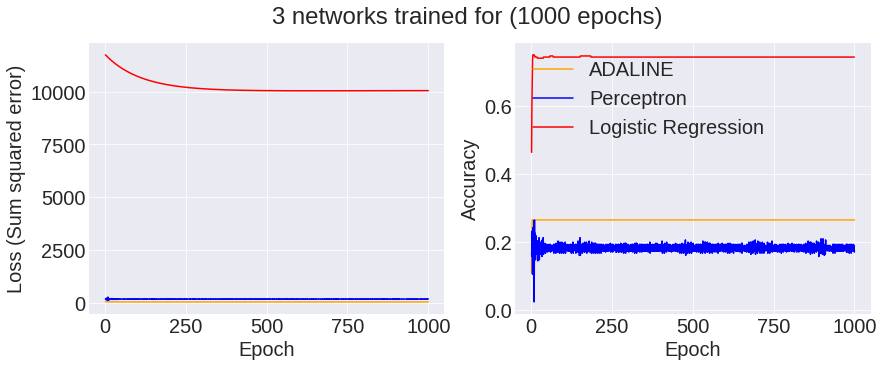

Final Loss and Accuracy for ADALINE: 27.105101602121742 0.2647058823529412
Final Loss and Accuracy for Perceptron: 170.5 0.16993464052287582
Final Loss and Accuracy for Logistic Regression: 10054.176689001837 0.7450980392156863


In [31]:
# plot loss and accuracy for 3 networks
plot_nets_train([haberman_a, haberman_p, haberman_l], [loss_ha, loss_hp, loss_hl], [acc_ha, acc_hp, acc_hl], ['ADALINE', 'Perceptron', "Logistic Regression"])
print("Final Loss and Accuracy for ADALINE:", loss_ha[-1], acc_ha[-1])
print("Final Loss and Accuracy for Perceptron:", loss_hp[-1], acc_hp[-1])
print("Final Loss and Accuracy for Logistic Regression:", loss_hl[-1], acc_hl[-1])

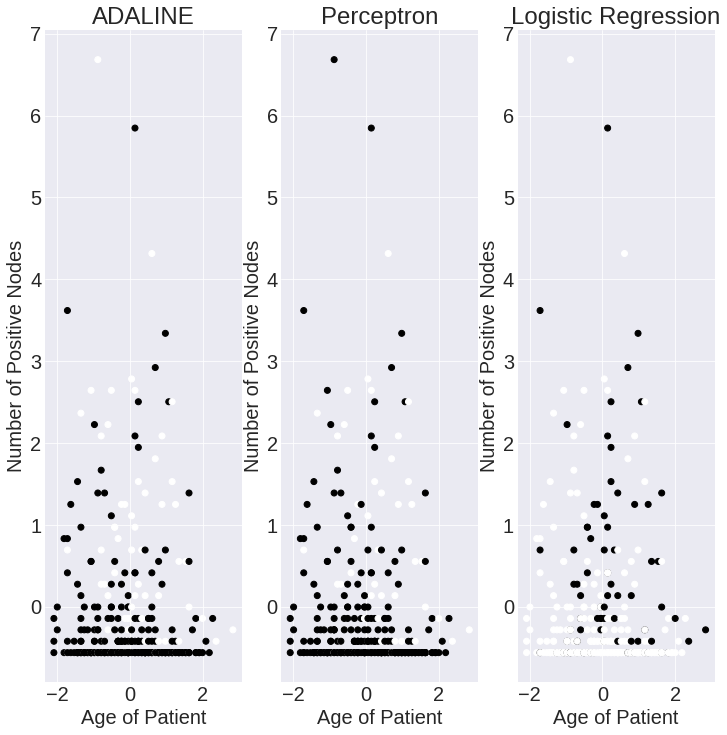

In [32]:
# compare predicted and true Haberman classes
pred_ha = haberman_a.predict(haberman)
pred_hp = haberman_p.predict(haberman)
pred_hl = haberman_l.predict(haberman)
diff_ha = np.where(pred_ha == postop, 0, 1)
diff_hp = np.where(pred_hp == postop, 0, 1)
diff_hl = np.where(pred_hl == postop, 0, 1)

# 3 plots
h_fig, h_ax = plt.subplots(1,3,figsize=(12,12))

# ADALINE
h_ax[0].scatter(haberman[:, 0], haberman[:, 2], c=diff_ha)
h_ax[0].set_title("ADALINE")
h_ax[0].set_xlabel("Age of Patient")
h_ax[0].set_ylabel("Number of Positive Nodes")

# Perceptron
h_ax[1].scatter(haberman[:, 0], haberman[:, 2], c=diff_hp)
h_ax[1].set_title("Perceptron")
h_ax[1].set_xlabel("Age of Patient")
h_ax[1].set_ylabel("Number of Positive Nodes")

# Logistic Regression
h_ax[2].scatter(haberman[:, 0], haberman[:, 2], c=diff_hl)
h_ax[2].set_title("Logistic Regression")
h_ax[2].set_xlabel("Age of Patient")
h_ax[2].set_ylabel("Number of Positive Nodes")

plt.show()

## Extension: One-vs-Rest for Classes Greater Than 2

For this extension, we created the file one_vs_rest.py, which contains a class that can perform classification when there are more than 2 classes. To accomplish this, a neural net fit() function was run for every class in the dataset, using the corresponding class label as 'True' with every other label as 'False'. Then, the highest activation values for each feature were recorded, and the corresponding label was assigned. It should be noted that this method becomes less efficient for every additional class label, so it's probably not the best way to accomplish this task.


As is shown below, this was accomplished with moderate success. Included is attempted classification on two well-known datasets, MNIST and iris (both of which are imported with scikitlearn's `fetch_openml` method, which is pretty cool). The MNIST dataset was huge, so to save some time only 1000 samples were used of the available 70000. An accuracy of ~98% was achieved on the MNIST dataset while n accuracy of ~86% was achieved on the iris dataset.

In [38]:
#multi class ADALINE training.
#first, we need a dataset.
#MNIST is pretty cool and we can download it with scikitlearn because it's famous
import sklearn
from sklearn.datasets import fetch_openml
iris_full=fetch_openml(data_id=61)
mnist_full = fetch_openml('mnist_784')

In [39]:
#MNIST import
mnist = mnist_full.data.astype(np.float64)
mnist_classes = mnist_full.target.astype(np.float64)
mnist_dev = mnist[:1000]
mnist_dev_classes = mnist_classes[:1000]

#standardizing
mnist_dev_std = (mnist_dev- np.mean(mnist_dev))/np.std(mnist_dev)
mnist_dev_std = (mnist_dev_std - np.mean(mnist_dev_std,axis=0))/np.std(mnist_dev_std,axis=0)


In [40]:
#iris import
iris = iris_full.data.astype(np.float64)
iris_classes = iris_full.target
iris_classes[iris_classes == "Iris-setosa"] = 0
iris_classes[iris_classes == "Iris-versicolor"] = 1
iris_classes[iris_classes == "Iris-virginica"] = 2
#standardizing
iris_std = (iris - np.mean(iris))/np.std(iris)
mnistdev_std = (iris_std - np.mean(iris_std,axis=0))/np.std(iris_std,axis=0)


In [41]:
import one_vs_rest
ovr_mnist = one_vs_rest.OneVsRest(10)
preds = ovr_mnist.multiple_classification(mnist_dev_std, mnist_dev_classes, lr=0.00001)
result = preds == mnist_dev_classes
accuracy = np.sum(np.where(result==True, 1,0)) / np.size(preds)
print(f'Accuracy of predictions: {accuracy}')

Accuracy of predictions: 0.977


In [42]:
ovr_iris = one_vs_rest.OneVsRest(3)
preds = ovr_iris.multiple_classification(iris_std, iris_classes, lr=0.001)
result = preds == iris_classes
accuracy = np.sum(np.where(result==True, 1,0)) / np.size(preds)
print(f'Accuracy of predictions: {accuracy}')

Accuracy of predictions: 0.86
